In [ ]:
import os
os.listdir('/content')


['.config', 'True.csv', 'Fake.csv', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- 1. LOAD DATA SAFELY ---
# The 'on_bad_lines' and 'engine' parameters fix your ParserError
print("Loading data...")
try:
    fake = pd.read_csv('Fake.csv', on_bad_lines='skip', engine='python')
    true = pd.read_csv('True.csv', on_bad_lines='skip', engine='python')
    print("Files loaded successfully!")
except FileNotFoundError:
    print("Error: Ensure Fake.csv and True.csv are uploaded to Colab.")

# Assign labels: 1 for Fake, 0 for Real
fake['label'] = 1
true['label'] = 0

# Combine the datasets and shuffle them
df = pd.concat([fake, true], axis=0).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

# --- 2. TEXT PREPROCESSING (The 'r' prefix fixes SyntaxWarnings) ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\\W"," ",text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

print("Cleaning text data... please wait.")
df['text'] = df['text'].apply(clean_text)

# --- 3. SPLIT & VECTORIZE ---
X = df['text']
y = df['label']

# 75% for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert text to numbers using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.7, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- 4. TRAIN MODEL ---
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# --- 5. EVALUATION ---
y_pred = model.predict(X_test_vec)
print("\n" + "="*35)
print("     IBM INTERNSHIP PROJECT RESULTS")
print("="*35)
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# --- 6. MANUAL TESTING TOOL ---
def predict_news(news_string):
    cleaned = clean_text(news_string)
    vectorized = vectorizer.transform([cleaned])
    result = model.predict(vectorized)
    return "FAKE NEWS" if result[0] == 1 else "REAL NEWS"

print("\n--- TEST YOUR OWN NEWS ---")
user_input = "The government is hiding a secret alien base under the White House."
print(f"Testing: {user_input}")
print(f"Result: {predict_news(user_input)}")

Loading data...
Files loaded successfully!
Cleaning text data... please wait.
Training Logistic Regression model...

     IBM INTERNSHIP PROJECT RESULTS
Overall Accuracy: 98.45%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2109
           1       0.99      0.98      0.98      2080

    accuracy                           0.98      4189
   macro avg       0.98      0.98      0.98      4189
weighted avg       0.98      0.98      0.98      4189


--- TEST YOUR OWN NEWS ---
Testing: The government is hiding a secret alien base under the White House.
Result: FAKE NEWS


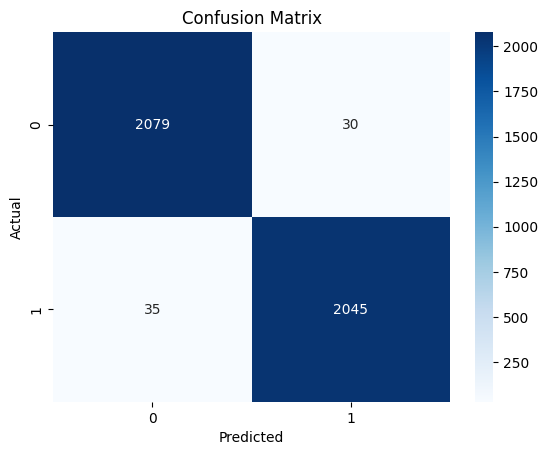

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 1. SAMPLE DATA (To "create" the model and vectorizer)
# In a real project, this would be your massive dataset
train_sentences = [
    "Scientists discover new planet", "Government passes new law",
    "Chocolate trees found on moon", "Aliens stole my toaster"
]
labels = [0, 0, 1, 1] # 0 = Real, 1 = Fake

# 2. DEFINE THE CLEANING FUNCTION
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    return text

# 3. INITIALIZE AND TRAIN (This creates the 'vectorizer' and 'model')
vectorizer = TfidfVectorizer()
cleaned_train = [clean_text(t) for t in train_sentences]
train_vectors = vectorizer.fit_transform(cleaned_train)

model = LogisticRegression()
model.fit(train_vectors, labels)

# 4. YOUR NEWS CHECKER FUNCTION
def check_news(news_string):
    cleaned_input = clean_text(news_string)
    vec_input = vectorizer.transform([cleaned_input])
    prediction = model.predict(vec_input)

    if prediction[0] == 1:
        return "⚠️ THIS NEWS IS LIKELY FAKE"
    else:
        return "✅ THIS NEWS IS LIKELY REAL"

# 5. RUN THE INTERACTIVE PART
print("--- INTERACTIVE NEWS CHECKER ---")
my_news = input("Enter a news headline to check: ")
print(f"Result: {check_news(my_news)}")

--- INTERACTIVE NEWS CHECKER ---
Enter a news headline to check: NASA confirms aliens are living in the center of the Earth
Result: ⚠️ THIS NEWS IS LIKELY FAKE
